In [19]:
import MetaTrader5 as mt5
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import datetime, timezone

print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)



MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.45


In [20]:
if not mt5.initialize():
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())
    
    
# you code here

{'login': 75525372, 'trade_mode': 0, 'leverage': 100, 'limit_orders': 200, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 111.83, 'credit': 0.0, 'profit': 0.0, 'equity': 111.83, 'margin': 0.0, 'margin_free': 111.83, 'margin_level': 0.0, 'margin_so_call': 50.0, 'margin_so_so': 30.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'mike bright', 'server': 'MetaQuotes-Demo', 'currency': 'USD', 'company': 'MetaQuotes Software Corp.'}


{'community_account': True, 'community_connection': True, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': False, 'build': 4065, 'maxbars': 100000, 'codepage': 0, 'ping_last': 140317, 'community_balance': 0.0, 'retransmission': 0.059724113129029775, 'company': 'MetaQuote

In [26]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")
    mt5.shutdown()

111.83
AI is successfully functional


In [27]:
#rates = mt5.copy_rates_from_pos("GBPUSD", mt5.TIMEFRAME_H1, 0, 99999)  
target_market = ["GBPUSD","USDCAD","XAUUSD"]

In [42]:
n = 2

In [43]:
model = joblib.load(target_market[n]+" regressor.joblib")
sc_x = joblib.load(target_market[n]+" sc_x.joblib")
sc_y = joblib.load(target_market[n]+" sc_y.joblib")

In [44]:
#dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])]
rates = mt5.copy_rates_from_pos(target_market[n], mt5.TIMEFRAME_H4, 0, 500)
print(rates[0][0])
print(rates.shape)
data = []
close_price = []
open_price = []

for i in range(len(rates)):
    data.append([rates[i][0],rates[i][1],rates[i][2],rates[i][3],rates[i][5]])
    open_price.append(rates[i][1])
    close_price.append(rates[i][4])
data = np.array(data)
close_price = np.array(close_price)
print(data)
print(close_price[-1:])

1689854400
(500,)
[[1.6898544e+09 1.9816000e+03 1.9832400e+03 1.9724000e+03 2.8390000e+04]
 [1.6898688e+09 1.9739800e+03 1.9801800e+03 1.9653600e+03 5.5131000e+04]
 [1.6898832e+09 1.9679900e+03 1.9715300e+03 1.9679600e+03 1.5809000e+04]
 ...
 [1.6999488e+09 1.9444200e+03 1.9480200e+03 1.9441500e+03 1.2575000e+04]
 [1.6999632e+09 1.9472300e+03 1.9591900e+03 1.9442400e+03 3.5537000e+04]
 [1.6999776e+09 1.9543900e+03 1.9708700e+03 1.9535700e+03 4.8789000e+04]]
[1964.44]


In [45]:
data = sc_x.transform(data)
y_pred = model.predict(data)
#print(y_pred)

In [46]:
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
print(y_pred)


[1975.03353333 1970.21413333 1968.9895     1971.96796667 1970.60166667
 1963.47406667 1963.54793333 1962.27466667 1962.1542     1961.3332
 1960.48403333 1960.47853333 1965.99246667 1960.45163333 1955.5701
 1955.05496667 1960.86656667 1962.10516667 1958.7984     1960.0582
 1963.9862     1964.62776667 1963.28156667 1970.28526667 1971.75706667
 1970.5241     1971.8718     1972.54816667 1976.66496667 1976.64113333
 1962.2057     1945.99756667 1945.41256667 1946.7475     1952.0442
 1949.83453333 1955.89736667 1959.60706667 1959.20133333 1958.12166667
 1954.9208     1953.70603333 1965.27036667 1969.81416667 1965.92123333
 1963.6731     1960.19153333 1956.32083333 1948.67763333 1943.86516667
 1943.75793333 1949.56933333 1946.56583333 1949.79766667 1946.97516667
 1936.35946667 1935.04073333 1935.65803333 1934.68873333 1936.54406667
 1933.0819     1935.14396667 1934.20656667 1936.2181     1935.1202
 1933.2504     1937.7728     1942.5331     1942.0606     1944.23903333
 1939.24783333 1936.269233

In [47]:
def r_squared(y_true, y_pred):
  """Calculates the R-squared score.

  Args:
    y_true: The ground truth values.
    y_pred: The predicted values.

  Returns:
    The R-squared score.
  """

  mean_y_true = np.mean(y_true)
  ss_tot = np.sum((y_true - mean_y_true)**2)
  ss_res = np.sum((y_true - y_pred)**2)
  r_squared = 1 - ss_res / ss_tot
  return r_squared

#y_pred = regressor.predict(x_test)
#y_pred = y_pred.reshape(-1)
r_squared = r_squared(close_price[-100:], y_pred[-100:])

print(r_squared)

score = model.score(
    data,
    sc_y.transform(close_price.reshape((len(close_price),1))).reshape(-1)
)
print(score)

0.9963397293248197
0.9994648034481318


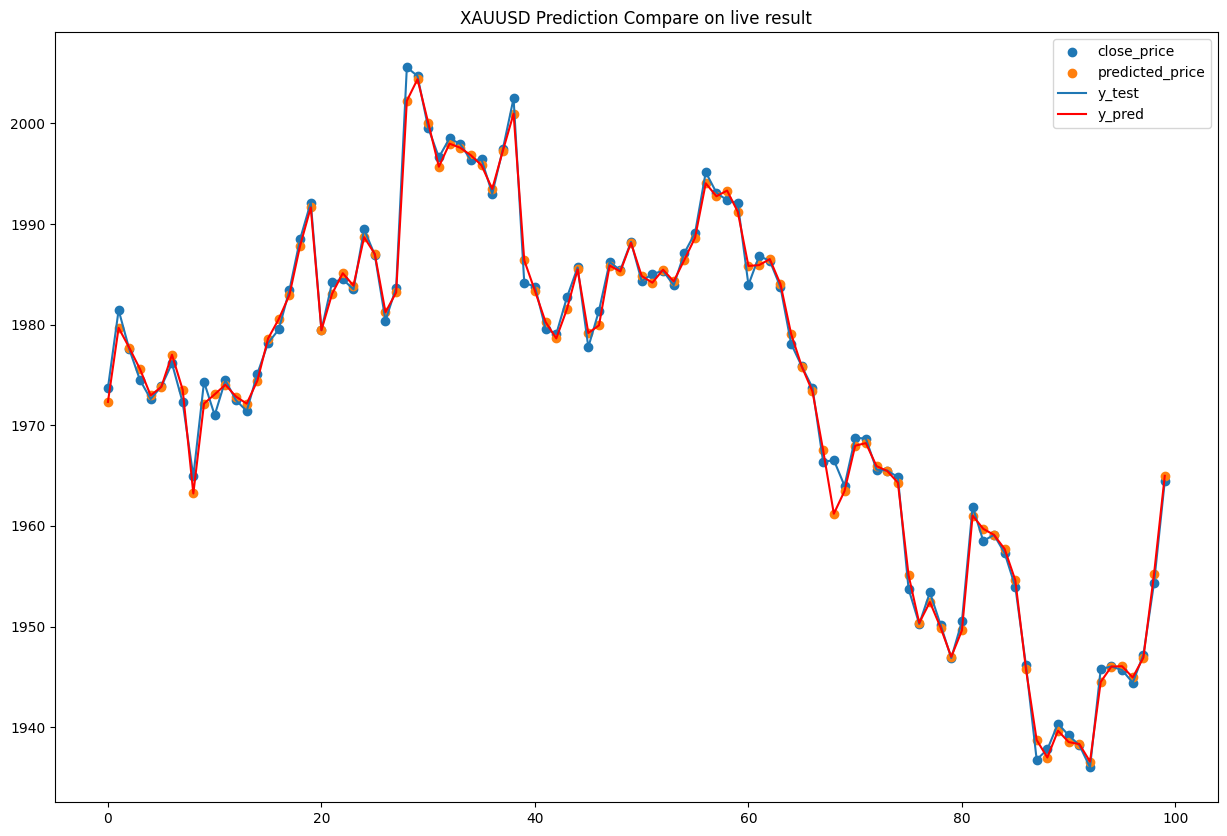

In [48]:
plt.figure(figsize=(15, 10))
plt.title(target_market[n]+" Prediction Compare on live result")
x_point = []
for i in range(len(close_price[-100:])):
  t = [i]
  x_point.append(t)
plt.scatter(x_point, close_price[-100:], label="close_price")
plt.scatter(x_point, y_pred[-100:], label="predicted_price")
plt.plot(close_price[-100:], label="y_test")
#plt.plot(open_price[-200:], label = "open price")
y_pred = model.predict(data[-100:])
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
plt.plot(
    y_pred,
    label="y_pred", color="red"
)



plt.legend()

plt.show()

In [40]:
data = sc_x.inverse_transform(data)


In [41]:
# creating an assumption on the system
print(close_price[-1:])
print(data[-1:,:])
y_pred = model.predict(sc_x.transform(data[-1:,:]))
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
print(y_pred)



[1.21147]
[[1.698264e+09 1.212700e+00 1.428000e+04]]
[1.21231177]


In [2]:
# set time zone to UTC
# Convert Unix epoch time to UTC time
utc_time = datetime.fromtimestamp(int(data[-1,0]))


# Extract the hour and minutes from the UTC datetime object
year = utc_time.year
month = utc_time.month
day = utc_time.day
hour = utc_time.hour
minutes = utc_time.minute

# Print the hour and minutes
# Print the results
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", hour)
print("Minutes:", minutes)

NameError: name 'data' is not defined

In [51]:
chart1H = mt5.copy_rates_from_pos(target_market[n], mt5.TIMEFRAME_H1, 0, 5)
print(chart1H[-1][0])

1698271200


In [52]:
utc_time1H = datetime.fromtimestamp(int(chart1H[-1][0]))
h = utc_time1H.hour
print(h)

for i in range(1,len(chart1H)):
    utc_time1H = datetime.fromtimestamp(int(chart1H[i * -1][0]))
    h = utc_time1H.hour
    if(hour == h):
        print(h, "The only time to trade")
        break
    print(h)

23
23
22
21 The only time to trade


In [22]:
#trade operation
if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is functional")
    total_order = mt5.positions_total()
    print(total_order)
    
    
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

AI is functional
4


In [10]:
# Get the current datetime in UTC
now_utc = datetime.utcnow()

# Convert the UTC datetime to GMT +0
now_gmt0 = now_utc.astimezone(timezone.utc)

# Get the year, month, day, and hour from the GMT +0 datetime
year = now_gmt0.year
month = now_gmt0.month
day = now_gmt0.day
hour = now_gmt0.hour + 1
mins = now_gmt0.minute
# Print the results
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", hour)
print("Minute:", mins)

Year: 2023
Month: 11
Day: 1
Hour: 7
Minute: 10


: 

In [45]:
lot = 0.01
symbol = "GBPUSD"
price = mt5.symbol_info_tick(symbol).bid
if(y_pred[-1] > price):
    price = mt5.symbol_info_tick(symbol).ask
    #buying a market
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt5.ORDER_TYPE_BUY,
        "price": price,
        "sl": 0.0,
        "tp": 0.0,
        "deviation": 20,
        "magic": 0,
        "comment": "Dbot_ML",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
elif(y_pred[-1] < price):
    price = mt5.symbol_info_tick(symbol).bid
    #buying a market
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt5.ORDER_TYPE_SELL,
        "price": price,
        "sl": 0.0,
        "tp":0.0,
        "deviation": 20,
        "magic": 0,
        "comment": "Dbot_ML",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
result=mt5.order_send(request)
print(result)

OrderSendResult(retcode=10018, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Market closed', request_id=2098276545, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='GBPUSD', volume=0.01, price=1.21471, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=0, type_filling=2, type_time=0, expiration=0, comment='Dbot_ML', position=0, position_by=0))


In [39]:
print(mt5.positions_total())

3


In [42]:
order_symbols = mt5.positions_get()
n = 1
for order_symbol in order_symbols:
    print(order_symbol.symbol)
    if(target_market[n] == order_symbol.symbol):
        print("seen")
        target_order = order_symbol
        break

print(target_order)
o_price = target_order.price_open
c_price = target_order.price_current
profit = target_order.profit
lot_size = target_order.volume
order_type = target_order.type
tp = target_order.tp
sl = target_order.sl

print("open price ", o_price)
print("close_price ",c_price)
print("profit ",profit)
print("lot size ",lot_size)
print("order type ",order_type)

USDCHF
USDCAD
seen
TradePosition(ticket=50764878607, time=1697054762, time_msc=1697054762903, time_update=1697054762, time_update_msc=1697054762903, type=1, magic=0, identifier=50764878607, reason=0, volume=0.01, price_open=1.36079, sl=0.0, tp=0.0, price_current=1.36136, swap=-0.01, profit=-0.42, symbol='USDCAD', comment='', external_id='')
open price  1.36079
close_price  1.36136
profit  -0.42
lot size  0.01
order type  1


In [27]:

#modify the market

request = {
    "action": mt5.TRADE_ACTION_SLTP,
    "symbol": target_order.symbol,
    "sl": 0.0,
    "tp": y_pred[-1],
    "position": target_order.ticket
}

result=mt5.order_send(request)
print(result)

OrderSendResult(retcode=10009, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=111532076, retcode_external=0, request=TradeRequest(action=6, magic=0, order=0, symbol='GBPUSD', volume=0.0, price=0.0, stoplimit=0.0, sl=0.0, tp=1.2213676333333343, deviation=0, type=0, type_filling=0, type_time=0, expiration=0, comment='', position=50758476285, position_by=0))


In [44]:
result = mt5.Close(target_order.symbol,ticket=target_order.ticket)
print(result)

False


In [22]:
print(mt5.last_error())
print(price)

(1, 'Success')
1.2278


: 

In [2]:
import time

for i in range(10):
    print("Hi ", i)
    time.sleep(5)

Hi  0
Hi  1
Hi  2
Hi  3
Hi  4
Hi  5
Hi  6
Hi  7
Hi  8
Hi  9
